In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("..").resolve()))

import pandas as pd
import matplotlib.pyplot as plt

from src.regimes import RegimeDetector


In [2]:
X = pd.read_csv(
    "../data/processed/features.csv",
    index_col=0,
    parse_dates=True
)

X.head()


,vol_20,vol_60,vol_120,vol_ratio_20_60,vol_ratio_60_120,skew_60,drawdown
Date,,,,,,,
2015-06-25,0.113112,0.167518,0.193649,0.675226,0.865059,0.858472,-0.013939
2015-06-26,0.110510,0.167839,0.191536,0.658427,0.876276,0.855908,-0.017401
2015-06-29,0.129978,0.174094,0.193719,0.746599,0.898693,0.656272,-0.038343
2015-06-30,0.131448,0.171461,0.192855,0.766636,0.889070,0.723492,-0.036280
2015-07-01,0.135626,0.171956,0.189520,0.788728,0.907322,0.680808,-0.028605


In [3]:
detector = RegimeDetector(n_regimes=3)
X["regime"] = detector.fit_predict(X)

X["regime"].value_counts()


regime
2    1011
0     856
1     528
Name: count, dtype: int64

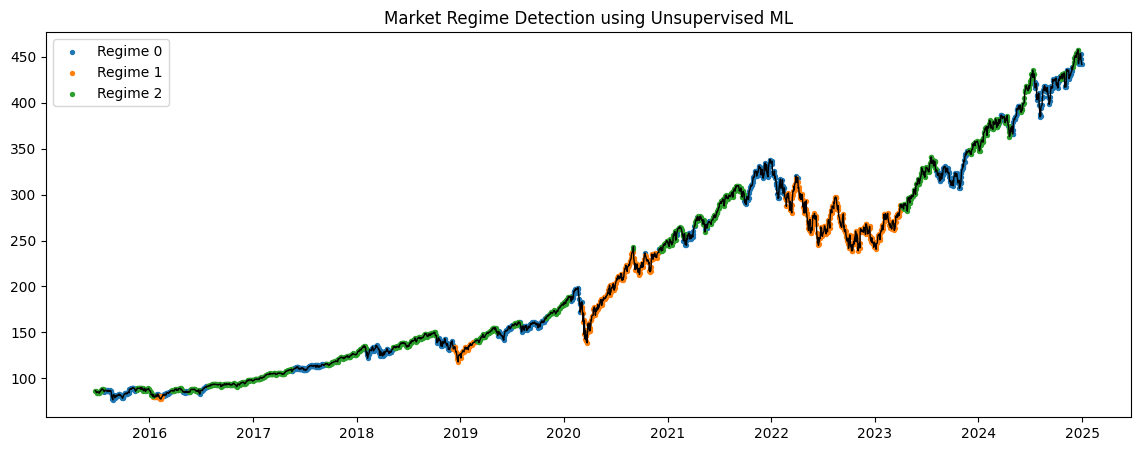

In [4]:
prices = pd.read_csv(
    "../data/raw/prices.csv",
    index_col=0,
    parse_dates=True
)

market_price = prices.mean(axis=1).loc[X.index]

plt.figure(figsize=(14,5))
plt.plot(market_price, color="black", linewidth=1)

for regime in sorted(X["regime"].unique()):
    mask = X["regime"] == regime
    plt.scatter(
        market_price.index[mask],
        market_price[mask],
        s=8,
        label=f"Regime {regime}"
    )

plt.title("Market Regime Detection using Unsupervised ML")
plt.legend()
plt.show()
